IMPORT LIBRARY & LOAD DRIVE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


READ DATASET & SOUTHERN ASIA COUNTRY SELECTED



In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/dataset_bigdata/aqi_dataset.csv")
southeast_asian_countries = ["Cambodia", "Indonesia", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Vietnam", "Laos"]
dataset_asian = dataset[dataset["Country"].isin(southeast_asian_countries)].copy()

DATASET SELECTED COUNTRY

In [ ]:
dataset_asian

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good,-206.00,1093414.00
43,Philippines,Dipolog,30,Good,1,Good,17,Good,0,Good,30,Good,1450958.00,1233408.00
79,Philippines,Toboso,54,Moderate,1,Good,20,Good,0,Good,54,Moderate,1924007.00,1235167.00
90,Philippines,Jasaan,59,Moderate,1,Good,32,Good,0,Good,59,Moderate,8.65,124.75
94,Philippines,Indang,50,Good,0,Good,24,Good,0,Good,50,Good,45336.00,1208833.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Myanmar,Taungdwingyi,28,Good,0,Good,25,Good,0,Good,28,Good,200017.00,955461.00
16621,Thailand,Chiang Mai,20,Good,0,Good,20,Good,0,Good,20,Good,187953.00,989986.00
16651,Vietnam,Vinh,105,Unhealthy for Sensitive Groups,4,Good,27,Good,6,Good,105,Unhealthy for Sensitive Groups,186667.00,1056667.00
16662,Thailand,Nakhon Si Thammarat,58,Moderate,1,Good,32,Good,0,Good,58,Moderate,900172.00,999631.00


COUNT EACH COUNTRY BY THE CITY

In [ ]:
country_counts = dataset_asian.groupby('Country').size()
print("Negara-negara yang ada pada kolom 'Country' dan jumlah valuenya:")
for country, count in country_counts.items():
    print(country + ':', count)

Negara-negara yang ada pada kolom 'Country' dan jumlah valuenya:
Cambodia: 8
Indonesia: 124
Laos: 4
Malaysia: 32
Myanmar: 40
Philippines: 359
Singapore: 1
Thailand: 160
Vietnam: 7


DATA CLEANING (CHECK NULL VALUE)

In [ ]:
dataset_asian.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 22 to 16678
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             735 non-null    object 
 1   City                735 non-null    object 
 2   AQI Value           735 non-null    int64  
 3   AQI Category        735 non-null    object 
 4   CO AQI Value        735 non-null    int64  
 5   CO AQI Category     735 non-null    object 
 6   Ozone AQI Value     735 non-null    int64  
 7   Ozone AQI Category  735 non-null    object 
 8   NO2 AQI Value       735 non-null    int64  
 9   NO2 AQI Category    735 non-null    object 
 10  PM2.5 AQI Value     735 non-null    int64  
 11  PM2.5 AQI Category  735 non-null    object 
 12  lat                 735 non-null    float64
 13  lng                 735 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 86.1+ KB


In [ ]:
dataset_asian.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

CHECK DUPLICATE DATA

In [ ]:
# Memeriksa duplikat data berdasarkan kolom 'City'
duplicate_cities = dataset_asian[dataset_asian.duplicated('City')]

# Menampilkan duplikat data
if len(duplicate_cities) > 0:
    print("Ada duplikat data dalam kolom 'City':")
    print(duplicate_cities)
else:
    print("Tidak ada duplikat data dalam kolom 'City'.")

Ada duplikat data dalam kolom 'City':
           Country         City  AQI Value AQI Category  CO AQI Value  \
264    Philippines        Baras         51     Moderate             1   
426    Philippines       Lucena         32         Good             1   
427    Philippines       Lucena         32         Good             1   
428    Philippines       Lucena         32         Good             1   
1110   Philippines     Claveria         95     Moderate             1   
...            ...          ...        ...          ...           ...   
13498  Philippines       Parang         50         Good             1   
15244  Philippines       Solano         56     Moderate             1   
15906    Indonesia         Palu         50         Good             1   
16102  Philippines  San Narciso         69     Moderate             0   
16390  Philippines    Koronadal         31         Good             1   

      CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
264      

HANDLING DUPLICATE DATA

In [ ]:
# Menghapus duplikat data berdasarkan kolom 'City'
dataset_asian_cleaned = dataset_asian.drop_duplicates(subset='City')

# Menyimpan dataset yang telah dibersihkan tanpa duplikat
dataset_asian_cleaned.to_csv('dataset_asian_cleaned.csv', index=False)

In [ ]:
dataset_asian_cleaned

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,Indonesia,Pontianak,44,Good,1,Good,15,Good,0,Good,44,Good,-206.00,1093414.00
43,Philippines,Dipolog,30,Good,1,Good,17,Good,0,Good,30,Good,1450958.00,1233408.00
79,Philippines,Toboso,54,Moderate,1,Good,20,Good,0,Good,54,Moderate,1924007.00,1235167.00
90,Philippines,Jasaan,59,Moderate,1,Good,32,Good,0,Good,59,Moderate,8.65,124.75
94,Philippines,Indang,50,Good,0,Good,24,Good,0,Good,50,Good,45336.00,1208833.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Myanmar,Taungdwingyi,28,Good,0,Good,25,Good,0,Good,28,Good,200017.00,955461.00
16621,Thailand,Chiang Mai,20,Good,0,Good,20,Good,0,Good,20,Good,187953.00,989986.00
16651,Vietnam,Vinh,105,Unhealthy for Sensitive Groups,4,Good,27,Good,6,Good,105,Unhealthy for Sensitive Groups,186667.00,1056667.00
16662,Thailand,Nakhon Si Thammarat,58,Moderate,1,Good,32,Good,0,Good,58,Moderate,900172.00,999631.00


ENCODE CATEGORICAL VARIABLES

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset_asian_cleaned['Country'] = label_encoder.fit_transform(dataset_asian_cleaned['Country'])
dataset_asian_cleaned['City'] = label_encoder.fit_transform(dataset_asian_cleaned['City'])
# dataset_asian_cleaned['AQI Value'] = label_encoder.fit_transform(dataset_asian_cleaned['AQI Value'])
dataset_asian_cleaned['AQI Category'] = label_encoder.fit_transform(dataset_asian_cleaned['AQI Category'])
# dataset_asian_cleaned['CO AQI Value'] = label_encoder.fit_transform(dataset_asian_cleaned['CO AQI Value'])
dataset_asian_cleaned['CO AQI Category'] = label_encoder.fit_transform(dataset_asian_cleaned['CO AQI Category'])
# dataset_asian_cleaned['Ozone AQI Value'] = label_encoder.fit_transform(dataset_asian_cleaned['Ozone AQI Value'])
dataset_asian_cleaned['Ozone AQI Category'] = label_encoder.fit_transform(dataset_asian_cleaned['Ozone AQI Category'])
# dataset_asian_cleaned['NO2 AQI Value'] = label_encoder.fit_transform(dataset_asian_cleaned['NO2 AQI Value'])
dataset_asian_cleaned['NO2 AQI Category'] = label_encoder.fit_transform(dataset_asian_cleaned['NO2 AQI Category'])
# dataset_asian_cleaned['PM2.5 AQI Value'] = label_encoder.fit_transform(dataset_asian_cleaned['PM2.5 AQI Value'])
dataset_asian_cleaned['PM2.5 AQI Category'] = label_encoder.fit_transform(dataset_asian_cleaned['PM2.5 AQI Category'])
dataset_asian_cleaned['lat'] = label_encoder.fit_transform(dataset_asian_cleaned['lat'])
dataset_asian_cleaned['lng'] = label_encoder.fit_transform(dataset_asian_cleaned['lng'])


<ipython-input-246-7cc3e6c9e84c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_asian_cleaned['Country'] = label_encoder.fit_transform(dataset_asian_cleaned['Country'])
<ipython-input-246-7cc3e6c9e84c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_asian_cleaned['City'] = label_encoder.fit_transform(dataset_asian_cleaned['City'])
<ipython-input-246-7cc3e6c9e84c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
dataset_asian_cleaned

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,1,412,44,0,1,0,15,0,0,0,44,0,118,367
43,5,137,30,0,1,0,17,0,0,0,30,0,527,511
79,5,566,54,1,1,0,20,0,0,0,54,1,550,520
90,5,169,59,1,1,0,32,0,0,0,59,1,153,89
94,5,162,50,0,0,0,24,0,0,0,50,0,217,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16608,4,544,28,0,0,0,25,0,0,0,28,0,460,140
16621,7,109,20,0,0,0,20,0,0,0,20,0,453,166
16651,8,587,105,3,4,0,27,0,6,0,105,3,451,325
16662,7,332,58,1,1,0,32,0,0,0,58,1,501,195


DATA CLEANING (COUNTRY & CITY REMOVED)

In [ ]:
columns_to_drop = ['Country', 'City']
dataset_asian_fix = dataset_asian_cleaned.drop(columns_to_drop, axis=1)
dataset_asian_fix

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
22,44,0,1,0,15,0,0,0,44,0,118,367
43,30,0,1,0,17,0,0,0,30,0,527,511
79,54,1,1,0,20,0,0,0,54,1,550,520
90,59,1,1,0,32,0,0,0,59,1,153,89
94,50,0,0,0,24,0,0,0,50,0,217,439
...,...,...,...,...,...,...,...,...,...,...,...,...
16608,28,0,0,0,25,0,0,0,28,0,460,140
16621,20,0,0,0,20,0,0,0,20,0,453,166
16651,105,3,4,0,27,0,6,0,105,3,451,325
16662,58,1,1,0,32,0,0,0,58,1,501,195


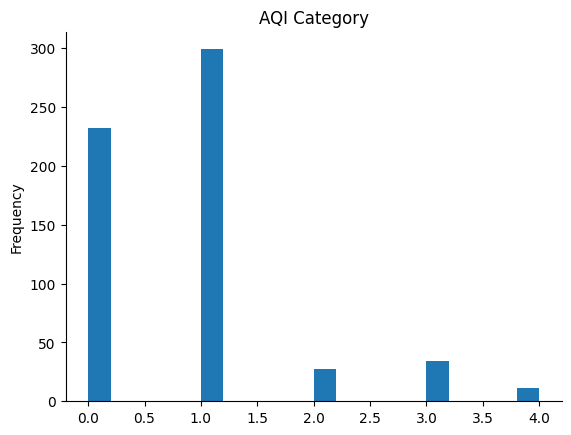

In [ ]:
# @title AQI Category

from matplotlib import pyplot as plt
dataset_asian_fix['AQI Category'].plot(kind='hist', bins=20, title='AQI Category')
plt.gca().spines[['top', 'right',]].set_visible(False)

EDA (Exploratory Data Analysis)

Plotting Visualization AQI in Southern Asia

In [ ]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(16,9))
# sns.scatterplot(data=dataset_asian_fix,x='lng',y='lat',hue='AQI Category',palette='Set1')
# plt.title('AQI Categories around the Southern Asia',fontsize=20)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()

Plotting Variables and Correlation each Variables

In [ ]:
# import seaborn as sns
# sns.pairplot(dataset_asian_fix,hue='AQI Category')
# plt.show()

Heatmap Correlation

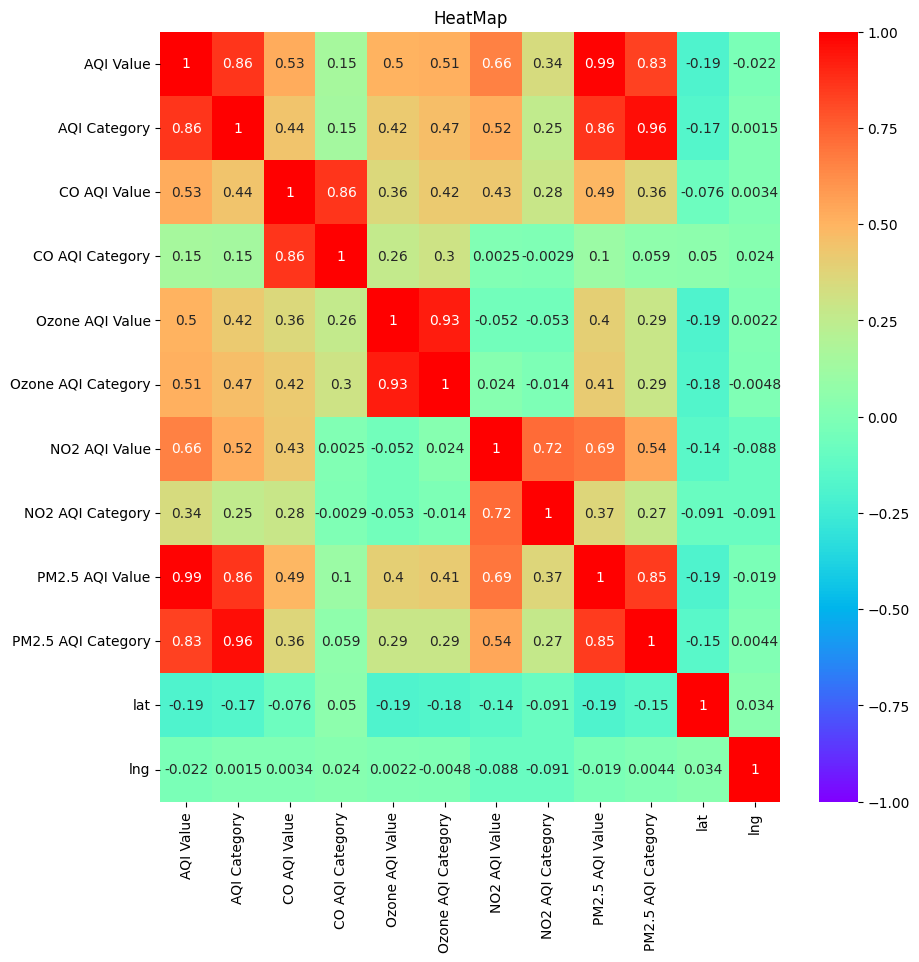

In [ ]:
# Membuat matriks korelasi
Corr = dataset_asian_fix.corr(numeric_only=True)

# Menentukan ukuran heatmap
plt.figure(figsize=(10, 10))

# Membuat heatmap dengan rentang nilai -1 sampai 1
sns.heatmap(Corr, annot=True, cmap='rainbow', vmin=-1, vmax=1)

# Menambahkan judul pada heatmap
plt.title('HeatMap')

# Menampilkan heatmap
plt.show()

FEATURE SELECTION BASED ON THE MOST CORRELATION VALUES AND SPLIT INDEPENDENT WITH DEPENDENT VARIABLE

In [ ]:
X = dataset_asian_fix[['AQI Value', 'CO AQI Value', 'CO AQI Category','Ozone AQI Value', 'Ozone AQI Category', 'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value', 'PM2.5 AQI Category']]
Y = dataset_asian_fix['AQI Category']

SPLIT TRAINING AND TESTING DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# Menampilkan jumlah data dalam setiap subset
print("Jumlah data dalam setiap subset:")
print("Data Latih (Train Data):", x_train.shape[0])
print("Data Uji (Test Data):", x_test.shape[0])

Jumlah data dalam setiap subset:
Data Latih (Train Data): 422
Data Uji (Test Data): 181


In [ ]:
# !pip install scikit-learn-extra

MODELLING WITH RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
score = []
for i in range(1,51):
    clf = RandomForestClassifier(criterion = 'entropy', n_estimators = i)
    clf.fit(x_train,y_train)
    scores = clf.score(x_test,y_test)
    score.append(scores)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisikan model Random Forest
rf_classifier = RandomForestClassifier()

# Tentukan kumpulan nilai n_estimators yang akan diuji
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

# Inisialisasi objek Grid Search
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid,
                          cv = 5, scoring = 'accuracy', n_jobs = -1)

# Lakukan pencarian Grid
grid_search.fit(x_train, y_train)

# Cetak hasil pencarian Grid
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("n_estimators:", params['n_estimators'], "- Akurasi:", mean_score)


n_estimators: 10 - Akurasi: 0.9952661064425771
n_estimators: 20 - Akurasi: 0.9952661064425771
n_estimators: 30 - Akurasi: 0.9976190476190476
n_estimators: 40 - Akurasi: 0.9976190476190476
n_estimators: 50 - Akurasi: 0.9976190476190476
n_estimators: 60 - Akurasi: 0.9976190476190476
n_estimators: 70 - Akurasi: 0.9976190476190476
n_estimators: 80 - Akurasi: 0.9976190476190476
n_estimators: 90 - Akurasi: 0.9976190476190476
n_estimators: 100 - Akurasi: 0.9976190476190476


In [ ]:
score_rate = pd.DataFrame(data = score, columns = ['Score'])
score_rate.insert(loc=0, column = 'n_estimators', value=range(1,51))
model = RandomForestClassifier(criterion='entropy', n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [ ]:
model.score(x_test,y_test)*100

99.4475138121547

IMPLEMENTATION

In [ ]:
from collections import Counter

predict = model.predict(x_test)

predict

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 2, 0, 3, 0, 0, 0, 0, 1, 3, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 4, 3,
       3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 1, 0, 4, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 3, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 1, 1, 4, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 3])

In [ ]:
value_counts = Counter(predict)

print("Nilai: Jumlah Kemunculan")
for value, count in value_counts.items():
    print(f"{value}: {count}")

Nilai: Jumlah Kemunculan
0: 71
1: 91
2: 9
3: 7
4: 3


MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.994475138121547


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        91
           2       0.89      1.00      0.94         8
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         3

    accuracy                           0.99       181
   macro avg       0.98      0.97      0.97       181
weighted avg       1.00      0.99      0.99       181



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)
cm

array([[71,  0,  0,  0,  0],
       [ 0, 91,  0,  0,  0],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  1,  7,  0],
       [ 0,  0,  0,  0,  3]])

EVALUATION MODEL

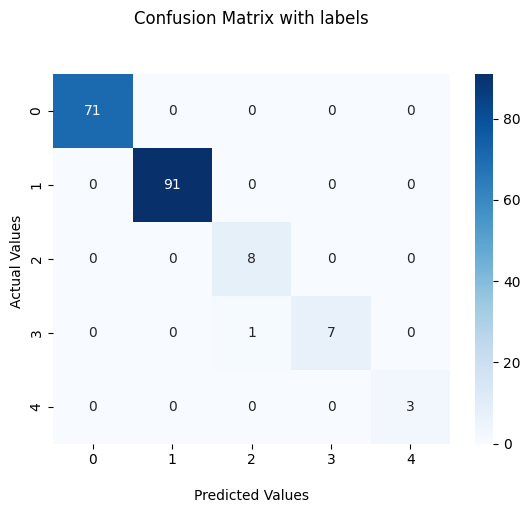

In [ ]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

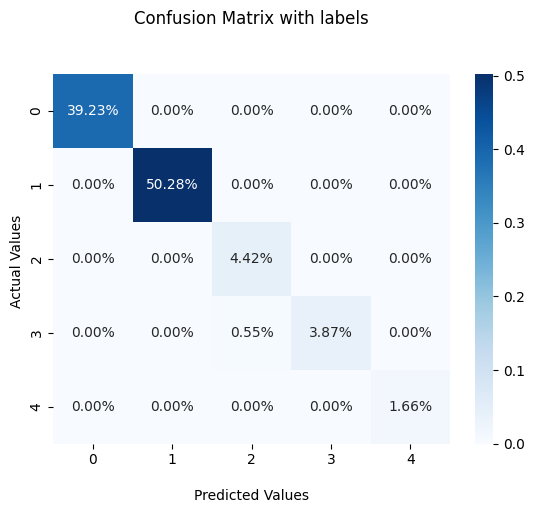

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

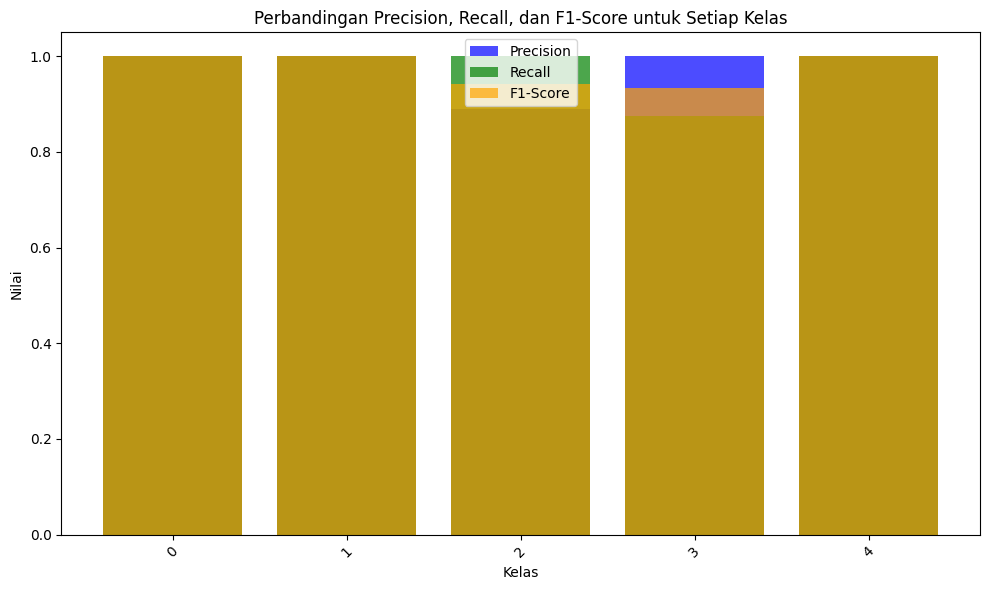

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

report = classification_report(y_test, predict, output_dict=True)
class_names = list(report.keys())[:-3]

precision = [report[c]['precision'] for c in class_names]
recall = [report[c]['recall'] for c in class_names]
f1_score = [report[c]['f1-score'] for c in class_names]

plt.figure(figsize=(10, 6))
plt.bar(class_names, precision, label='Precision', color='blue', alpha=0.7)
plt.bar(class_names, recall, label='Recall', color='green', alpha=0.7)
plt.bar(class_names, f1_score, label='F1-Score', color='orange', alpha=0.7)
plt.title('Perbandingan Precision, Recall, dan F1-Score untuk Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
